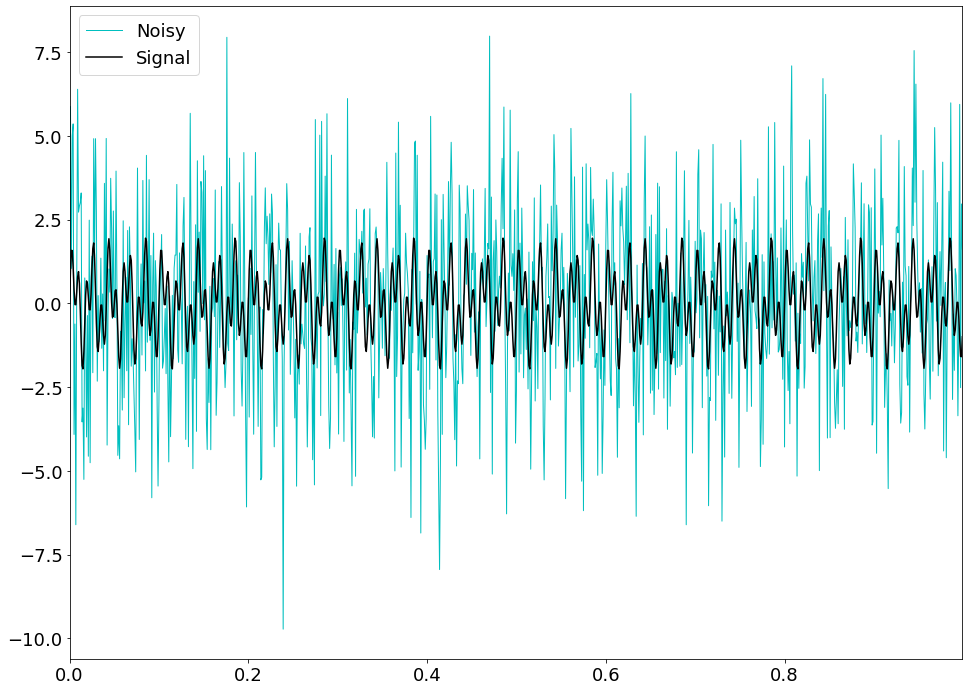

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# let's create a signal with two frequencies

i_t = 0.001
pt = np.arange(0,1, i_t)

# our signal will be carried two different frequencies

Signal = np.sin(2*np.pi*50*pt) + np.sin(2*np.pi*120*pt)
Signal_clean = Signal
# create a random then add to our signal
Signal = Signal + 2.5*np.random.randn(len(pt))
plt.plot(pt, Signal, color="c", label="Noisy", linewidth=1)
plt.plot(pt, Signal_clean, color="k", label="Signal", linewidth=1.5)
plt.xlim(pt[0], pt[-1])
plt.legend()

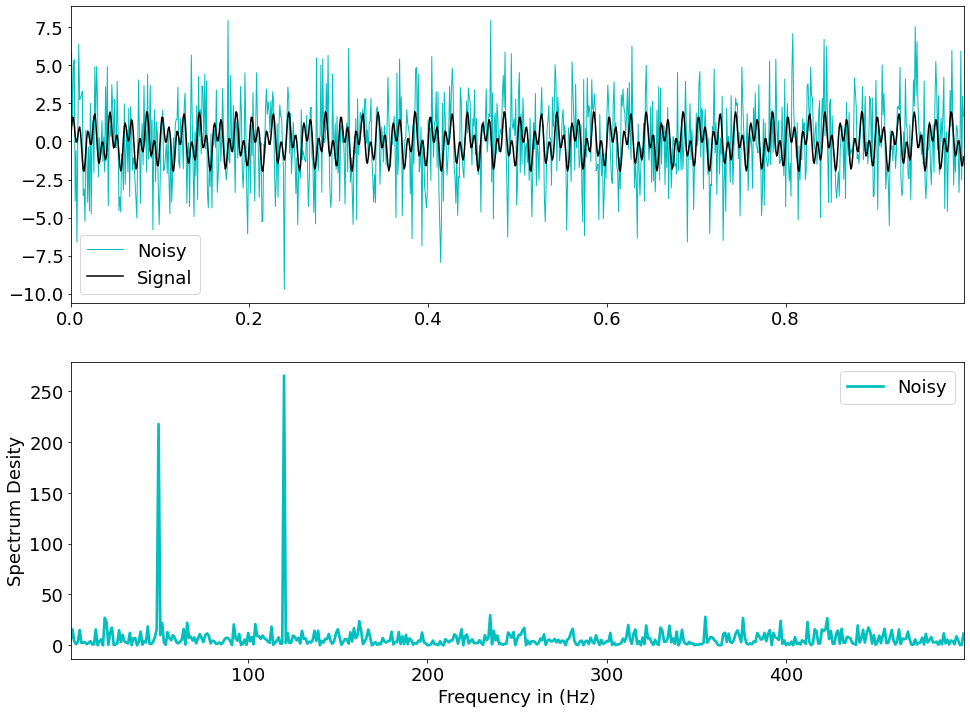

In [29]:
# let's compute Fast Fourier Transform

n= len(pt) # compute the number of points we want
Ftr = np.fft.fft(Signal, n) # Compute the Fast Fourier Transform 
P_S_D = Ftr * np.conj(Ftr) / n # Power Spectrum Density
V_freq = (1/(i_t*n)) * np.arange(n) # compute the vecteur along frequency in x-axis
L = np.arange(1, np.floor(n/2), dtype="int") # we only pick up some specific number of frequencies according to the power spectrum

fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(pt, Signal, color="c", label="Noisy", linewidth=1)
plt.plot(pt, Signal_clean, color="k", label="Signal", linewidth=1.5)
plt.xlim(pt[0], pt[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(V_freq[L], P_S_D[L], color="c", label="Noisy", linewidth=2.7)
plt.xlim(V_freq[L[0]], V_freq[L[-1]])
plt.xlabel("Frequency in (Hz)")
plt.ylabel("Spectrum Desity")
plt.legend()

plt.show()

In [33]:
# let's build a filter since we discovered that picks appeared around 49.9hz and 120hz. so the idea is:
# to keep frequencies which are in between [49.9 : 50] and [119.9 : 120] the remaining will be all zero
# therefore if the have a PSD up or equal to 100 WE keep it otherwise it's zero.

index = P_S_D > 100 # checkinh all power density which is >= 100
PSD_clean = index * P_S_D 
Ftr = index * Ftr # zero all the smalls fourier coefficients in Y
F_fil = np.fft.ifft(Ftr) # reconstitution of the signal

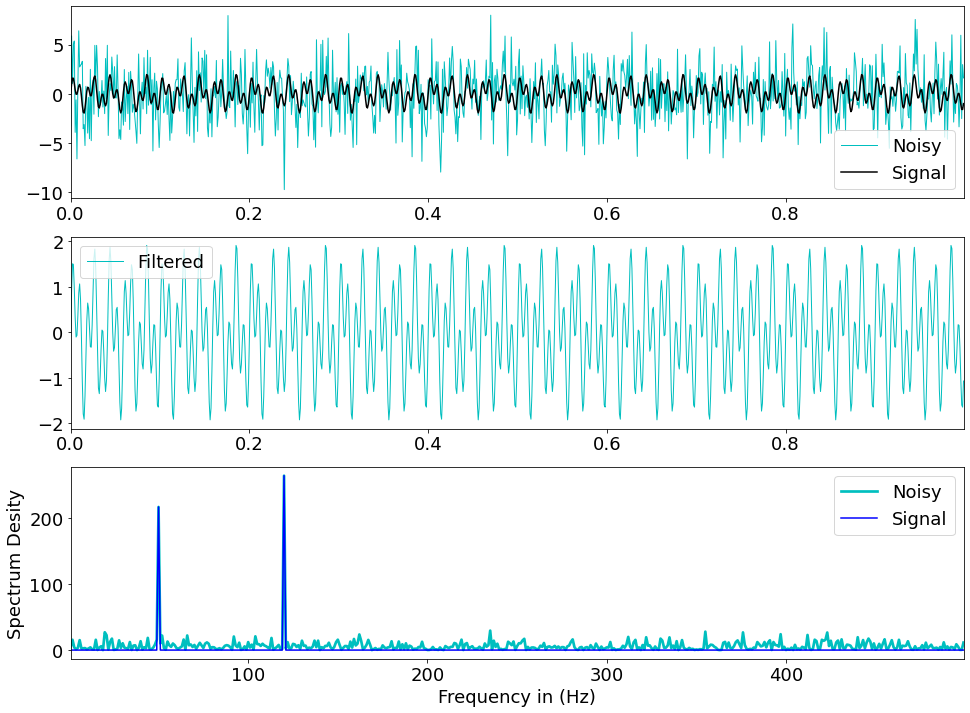

In [37]:
fig, axs = plt.subplots(3, 1)

plt.sca(axs[0])
plt.plot(pt, Signal, color="c", label="Noisy", linewidth=1)
plt.plot(pt, Signal_clean, color="k", label="Signal", linewidth=1.5)
plt.xlim(pt[0], pt[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(pt, F_fil, color="c", label="Filtered", linewidth=1)
plt.xlim(pt[0], pt[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(V_freq[L], P_S_D[L], color="c", label="Noisy", linewidth=2.7)
plt.plot(V_freq[L], PSD_clean[L], color="b", label="Signal", linewidth=1.5)
plt.xlim(V_freq[L[0]], V_freq[L[-1]])
plt.xlabel("Frequency in (Hz)")
plt.ylabel("Spectrum Desity")
plt.legend()

plt.show()